In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 5.4 損失関数

### 5.4.1 二乗和誤差

In [2]:
import numpy as np

def square_sum(y, t): # 出力値と正解値を引数に取る
    return 1.0 / 2.0 * np.sum(np.square(y - t))

### 5.4.2 交差エントロピー誤差

In [3]:
import numpy as np

def cross_entropy(y, t): # 出力値と正解値を引数に取る
    return - np.sum(t * np.log(y + 1e-7)) # 1e-7は無限小に発散することを防いでいる

## 5.9 バックプロパゲーションの実装 -回帰-

### 5.9.2 出力層の実装

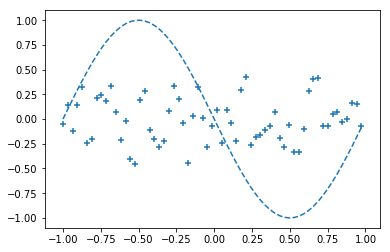

Epoch:0/2001 Error:0.270895931693856


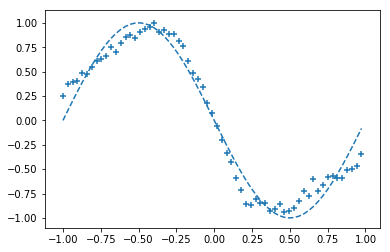

Epoch:200/2001 Error:0.008875391273837428


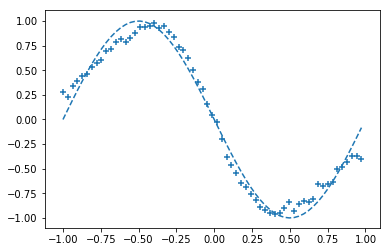

Epoch:400/2001 Error:0.005431017680291765


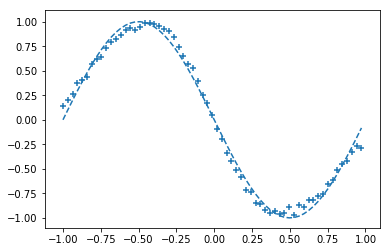

Epoch:600/2001 Error:0.0022913464002866164


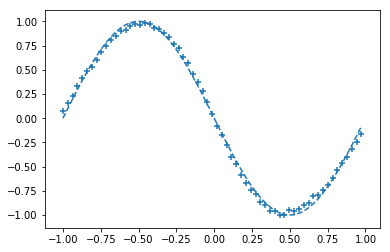

Epoch:800/2001 Error:0.0007683045351598195


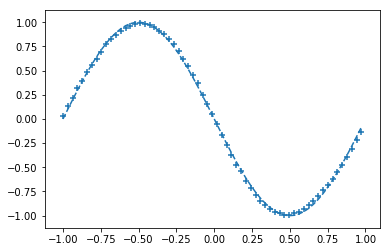

Epoch:1000/2001 Error:0.0002664305677212988


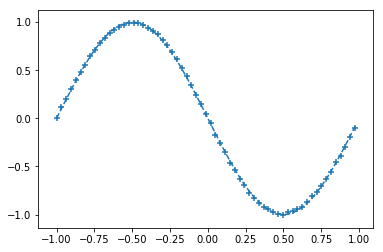

Epoch:1200/2001 Error:7.161923819638862e-05


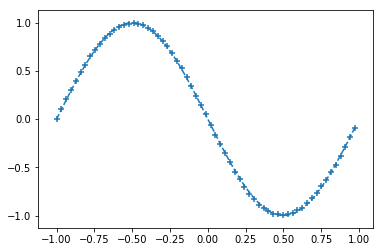

Epoch:1400/2001 Error:3.2135178058003254e-05


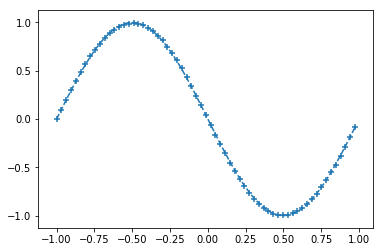

Epoch:1600/2001 Error:1.7128463979315966e-05


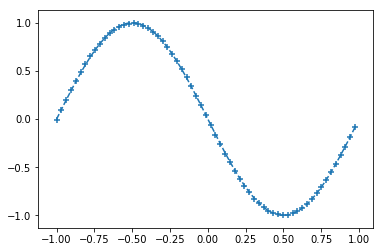

Epoch:1800/2001 Error:1.1871036145455078e-05


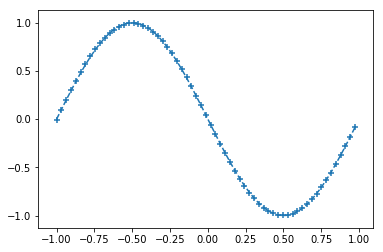

Epoch:2000/2001 Error:9.725624080362269e-06


In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 入力と正解の用意
input_data = np.arange(0, np.pi * 2, 0.1) # 入力
correct_data = np.sin(input_data)         # 正解
input_data = (input_data - np.pi)/ np.pi  # 入力を-1.0~1.0の範囲に
n_data = len(correct_data)

# 各設定値
n_in = 1  # 入力層のニューロン層
n_mid = 3 # 中間層のニューロン層
n_out = 1 # 出力層のニューロン層

wb_width = 0.01 # 重みとバイアスの広がり具合
eta = 0.1
epoch = 2001
interval = 200

# 中間層
class MiddleLayer: 
    def __init__(self, n_upper, n):  # 初期設定
        # 重み（行列）とバイアス（ベクトル）
        self.w = wb_width * np.random.randn(n_upper, n) # 重み（行列）
        self.b = wb_width * np.random.randn(n)          # バイアス（ベクトル）
    
    def forward(self, x):       # 順伝播
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1 / (1 + np.exp(-u)) # シグモイド関数
        
    def backward(self, grad_y): # 逆伝播
        delta = grad_y * (1 - self.y) * self.y # シグモイド関数の微分
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis = 0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):      # 重みとバイアスの更新
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b 

class OutputLayer: 
    def __init__(self, n_upper, n): # 初期設定
        self.w = wb_width * np.random.randn(n_upper, n) # 重み（行列）
        self.b = wb_width * np.random.randn(n)          # バイアス
        
    def forward(self, x):  # 順伝播
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u         # 恒等関数
    
    def backward(self, t): # 逆伝播
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis = 0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta): # 重みとバイアスの更新
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

# -- 各層の初期化 --
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# -- 学習 --
for i in range(epoch):

    # インデックスをシャッフル
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    # 結果の表示用
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        
        x = input_data[idx:idx+1]  # 入力
        t = correct_data[idx:idx+1]  # 正解
        
        # 順伝播
        middle_layer.forward(x.reshape(1, 1))  # 入力を行列に変換
        output_layer.forward(middle_layer.y)  

        # 逆伝播
        output_layer.backward(t.reshape(1, 1))  # 正解を行列に変換
        middle_layer.backward(output_layer.grad_x)
        
        # 重みとバイアスの更新
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            
            y = output_layer.y.reshape(-1)  # 行列をベクトルに戻す

            # 誤差の計算
            total_error += 1.0/2.0*np.sum(np.square(y - t))  # 二乗和誤差
            
            # 出力の記録
            plot_x.append(x)
            plot_y.append(y)
            
    if i%interval == 0:
        
        # 出力のグラフ表示
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
        
        # エポック数と誤差の表示
        print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))

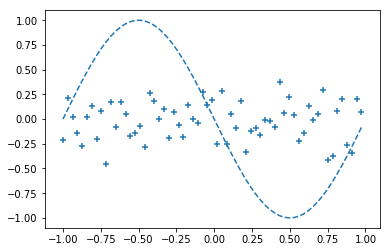

Epoch:0/2001 Error:0.26910136766773013


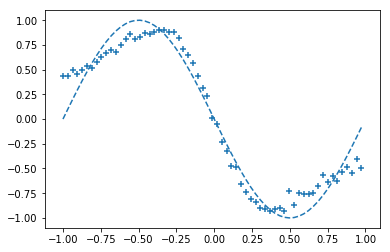

Epoch:200/2001 Error:0.012167595070224054


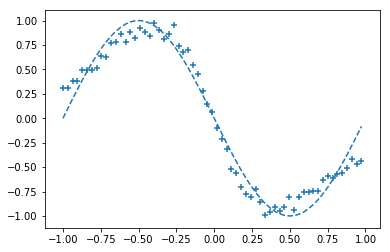

Epoch:400/2001 Error:0.008763357220310998


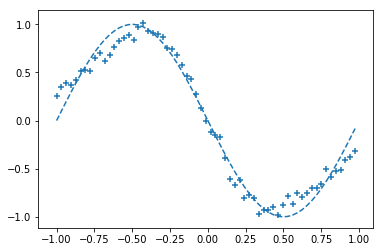

Epoch:600/2001 Error:0.0067056747458789446


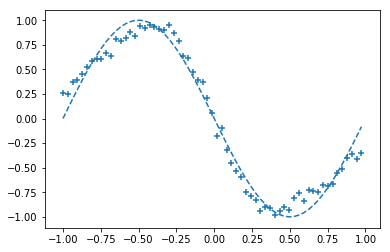

Epoch:800/2001 Error:0.006475825379953662


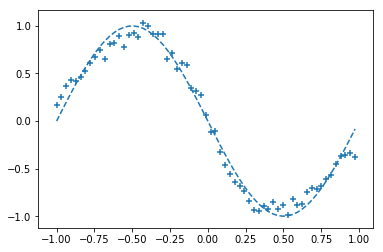

Epoch:1000/2001 Error:0.005025488831415981


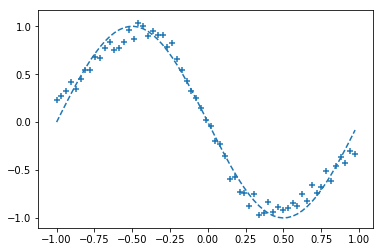

Epoch:1200/2001 Error:0.00498607291058002


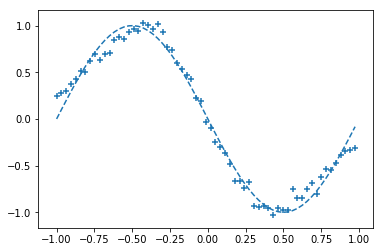

Epoch:1400/2001 Error:0.00461254418193994


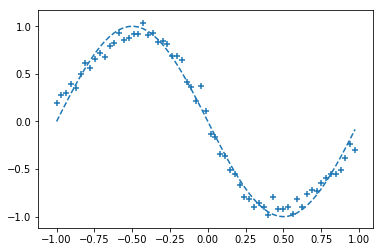

Epoch:1600/2001 Error:0.00428463142878538


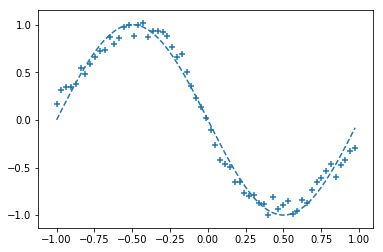

Epoch:1800/2001 Error:0.004616123879537819


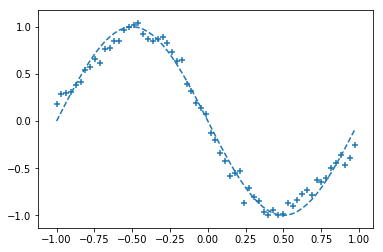

Epoch:2000/2001 Error:0.0042388160170830184


In [5]:
# 各設定値
n_in = 1  # 入力層のニューロン層
n_mid = 2 # 中間層のニューロン層
n_out = 1 # 出力層のニューロン層

# -- 各層の初期化 --
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# -- 学習 --
for i in range(epoch):

    # インデックスをシャッフル
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    # 結果の表示用
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        
        x = input_data[idx:idx+1]  # 入力
        t = correct_data[idx:idx+1]  # 正解
        
        # 順伝播
        middle_layer.forward(x.reshape(1, 1))  # 入力を行列に変換
        output_layer.forward(middle_layer.y)  

        # 逆伝播
        output_layer.backward(t.reshape(1, 1))  # 正解を行列に変換
        middle_layer.backward(output_layer.grad_x)
        
        # 重みとバイアスの更新
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            
            y = output_layer.y.reshape(-1)  # 行列をベクトルに戻す

            # 誤差の計算
            total_error += 1.0/2.0*np.sum(np.square(y - t))  # 二乗和誤差
            
            # 出力の記録
            plot_x.append(x)
            plot_y.append(y)
            
    if i%interval == 0:
        
        # 出力のグラフ表示
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
        
        # エポック数と誤差の表示
        print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))

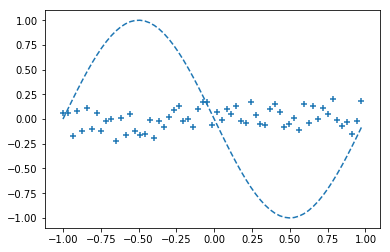

Epoch:0/2001 Error:0.2784775574351771


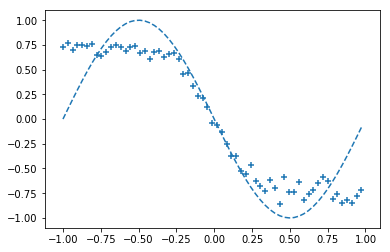

Epoch:200/2001 Error:0.038966998324787075


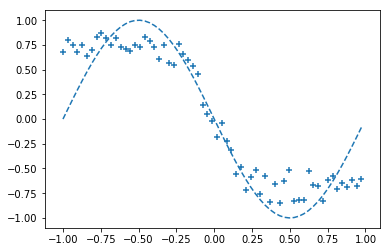

Epoch:400/2001 Error:0.03300735252767699


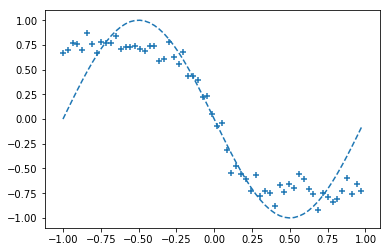

Epoch:600/2001 Error:0.0345436556515708


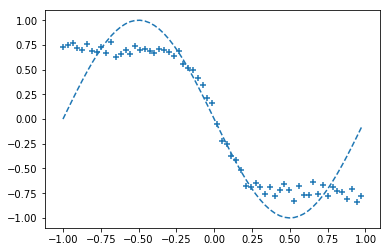

Epoch:800/2001 Error:0.036535735954124814


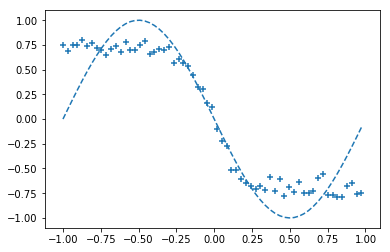

Epoch:1000/2001 Error:0.03599949284107454


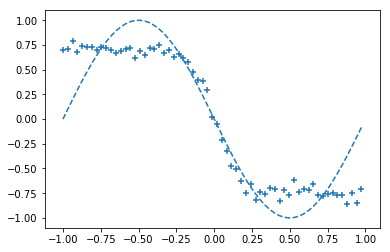

Epoch:1200/2001 Error:0.03631468813971828


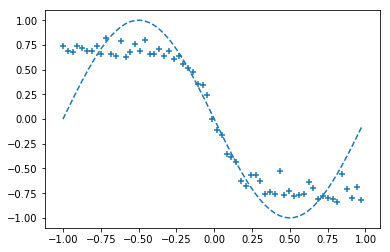

Epoch:1400/2001 Error:0.03536303969423902


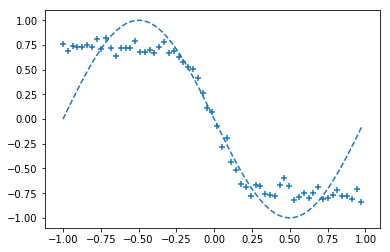

Epoch:1600/2001 Error:0.03580459354349682


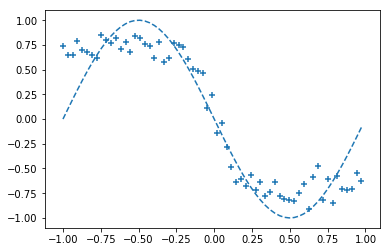

Epoch:1800/2001 Error:0.030367306648212217


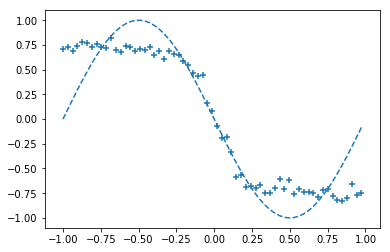

Epoch:2000/2001 Error:0.036081573754368726


In [6]:
# 各設定値
n_in = 1  # 入力層のニューロン層
n_mid = 1 # 中間層のニューロン層
n_out = 1 # 出力層のニューロン層

# -- 各層の初期化 --
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# -- 学習 --
for i in range(epoch):

    # インデックスをシャッフル
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    # 結果の表示用
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        
        x = input_data[idx:idx+1]  # 入力
        t = correct_data[idx:idx+1]  # 正解
        
        # 順伝播
        middle_layer.forward(x.reshape(1, 1))  # 入力を行列に変換
        output_layer.forward(middle_layer.y)  

        # 逆伝播
        output_layer.backward(t.reshape(1, 1))  # 正解を行列に変換
        middle_layer.backward(output_layer.grad_x)
        
        # 重みとバイアスの更新
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            
            y = output_layer.y.reshape(-1)  # 行列をベクトルに戻す

            # 誤差の計算
            total_error += 1.0/2.0*np.sum(np.square(y - t))  # 二乗和誤差
            
            # 出力の記録
            plot_x.append(x)
            plot_y.append(y)
            
    if i%interval == 0:
        
        # 出力のグラフ表示
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
        
        # エポック数と誤差の表示
        print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))